# Goal

Get biweight center and scale for all of the groups in our Halpha Groups sample.

In [19]:
from astropy.io import fits
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.stats import biweight_scale,biweight_location,SigmaClip
import os
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib import pyplot as plt

In [53]:
def get_biweight(z,nsigma=2):
    """pass in redshift of galaxies in the vicinity of a group"""
    from astropy.stats import sigma_clip
    #sigclip = SigmaClip(sigma=scale_cut,maxiters=10,cenfunc=biweight_location,stdfunc=biweight_scale)
    good_data = sigma_clip(z, sigma=nsigma, maxiters=10, stdfunc=biweight_scale,cenfunc=biweight_location)
    return good_data


In [48]:
# create a test dataset
realsigma = 350
realcenter = 2200
realZ = np.random.normal(loc=realcenter,scale=realsigma,size=100)
noiseZ = np.random.uniform(100,5000,size=100)
testZ = np.array(realZ.tolist()+noiseZ.tolist())
goodZ = get_biweight(testZ,nsigma=2)

(array([ 1.,  0.,  3., 10., 18., 17., 27., 18.,  5.,  1.]),
 array([ 778.02527322, 1026.93986084, 1275.85444846, 1524.76903607,
        1773.68362369, 2022.59821131, 2271.51279893, 2520.42738655,
        2769.34197417, 3018.25656179, 3267.17114941]),
 [<matplotlib.patches.Polygon at 0x7f62e264df10>])

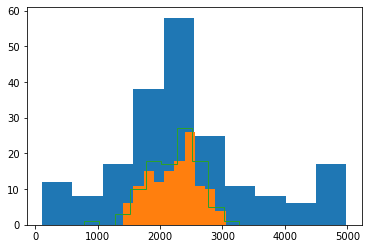

In [49]:

plt.hist(testZ)
plt.hist(goodZ[~goodZ.mask])
plt.hist(realZ,histtype='step')

In [50]:
# measure the location and scale from the clipped data
print(realcenter,biweight_location(goodZ[~goodZ.mask]))
print(realsigma,biweight_scale(goodZ[~goodZ.mask]))

2200 2240.646705623918
350 410.0149084896051


In [51]:
# measure the location and scale directly from the simulated data
print(realcenter,biweight_location(realZ))
print(realsigma,biweight_scale(realZ))

2200 2266.8135102028837
350 407.91177710697406


In [55]:
def get_biweight(z,nsigma=2):
    """
    PARAMS:
    z : redshift of galaxies in the vicinity of a group
    nsigma : sigma to use in sigma clipping
    
    RETURN:
    c : biweight center
    s : biweight scale
    masked_data : input array, as masked array, where mask=True indicated clipped data
    """
    from astropy.stats import sigma_clip
    #sigclip = SigmaClip(sigma=scale_cut,maxiters=10,cenfunc=biweight_location,stdfunc=biweight_scale)
    good_data = sigma_clip(z, sigma=nsigma, maxiters=10, stdfunc=biweight_scale,cenfunc=biweight_location)
    c = biweight_location[good_data[~good_data.mask]]
    s = biweight_scale[good_data[~good_data.mask]]
    return c,s, good_data


# Next Steps

* read in file with RA, DEC, and vr of groups
* read in NSA
* convert theta to Mpc at distance of group
* for each group, cut NSA within dv < 4000 and dr < 1 Mpc
* feed cut sample into biweight calculator

Can use 

`uat_all_galaxies_fov.py`